# Dataset Information

Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# 1: Import Libraries

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.preprocessing import RobustScaler


# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for path
import os

# 2: Reading the Dataset

In [3]:
dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

The shape of the dataset is (10834, 18).




# 3- Explainatry Data Analysis - EDA

In [4]:
# Shape or Size
df.shape

(10834, 18)

In [5]:
df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


**The shape of the dataset is (10834, 18) , containing 17 Features beside (Y / Bean Class)**

In [6]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

**The features are all numerical but (Y / Bean Class)**
<br>
**No Nullable Data**

In [7]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

**Number of instancs for each class , Dermason has the highest number.**

# Data Visualization
**Heatmap**

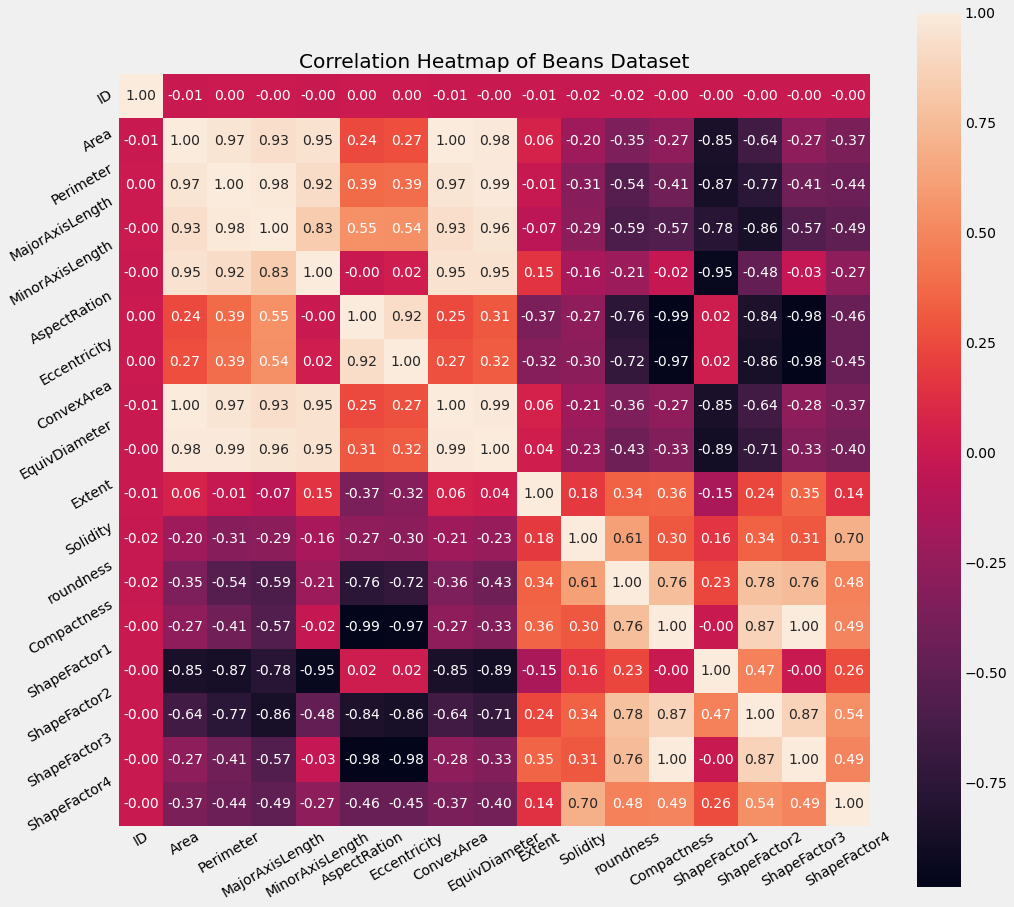

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [9]:
neededColumns = ['ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4','Area']

transformer = RobustScaler().fit(df[neededColumns])
df[neededColumns] =transformer.transform(df[neededColumns])

transformer = RobustScaler().fit(df_test[neededColumns])
df_test[neededColumns]=transformer.transform(df_test[neededColumns])

From this correlation matrix we can exctract features that are strongly correlated like : 
- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

Features to be drobbed : 

- ShapeFactor3
- Compactness
- AspectRation
- Area
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [10]:
from sklearn.model_selection import cross_val_score,train_test_split

df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train.drop(columns=['ID', 'y' , 'ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1' ])
y_train = df_train['y']

X_val = df_val.drop(columns=['ID', 'y', 'ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1' ])
y_val = df_val['y']


print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(8667, 7) (2167, 7) (8667,) (2167,)


# 4- Feature Engineering

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5.416500e+03,8124.750000,10833.000000
Area,10834.0,0.338684,1.183999,-0.970884,-0.332705,0.000000e+00,0.667295,8.415165
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,7.937395e+02,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,2.963774e+02,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,1.925250e+02,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761e+00,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,7.643135e-01,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,4.514800e+04,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,2.384193e+02,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,7.601408e-01,0.786871,0.866195


**Features like:** (Eccentricity , Extent ,Solidity ,roundness ,Compactness ,and shapeFactor1,2,3,4 ) **ranges between (0 and 1)**

**On the other side , there are other features like:**
- (Area) ranges between (20420 and 254616 )
- (ConvexArea) ranges between (20684 and 263261 )

When a dataset has values of different columns at different scales, it gets tough to analyze the trends and patterns , so we need to make sure that all the columns have a significant difference in their scales, and they can be modified in such a way that all those values fall into the same scale. This process is called Scaling.

### Data scaling using MinMaxScaler

## Model Training


Let's train a model with the data!

In [12]:
##df_scaled.head()

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier = classifier.fit(X_train, y_train)


**Accuracy : is one of the simplest form of evaluation metrics , it means that how many data points are predicted correctly**

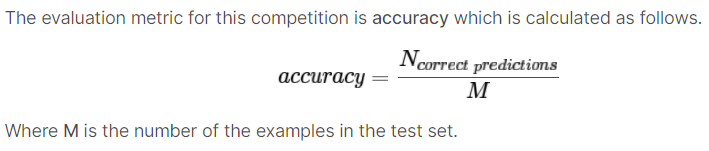

**The accuracy can be defined as the percentage of correctly classified instances (TP + TN)/(TP + TN + FP + FN). where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives, respectively.**


In [14]:
from sklearn.metrics import accuracy_score

y_train_pred = classifier.predict(X_train)
print('Training Accuracy =', accuracy_score(y_train, y_train_pred))

Training Accuracy = 1.0


In [15]:
y_val_pred = classifier.predict(X_val)
print('Validation Accuracy =', accuracy_score(y_val, y_val_pred))

Validation Accuracy = 0.9321642824180896


Train on all data

## Model Prediction 

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 


In [16]:
# Predicting y of Test data

# Step 1 - applying scalling
##X_test_scaled = scaler.transform(df_test.drop(columns = ['ID']))
##X_test_scaled = pd.DataFrame(X_test_scaled , columns= df_test.columns.difference(['ID']))

# Step 2- removing unimportant features
X_test = df_test.drop(columns=['ID','ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1'])


y_test_predicted = classifier.predict(X_test)

# add y column to the test data
df_test['y'] = y_test_predicted

df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,0.520446,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.057203,-0.685599,-1.330742,-8.251666,HOROZ
1,10835,-0.613178,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.978391,0.639939,0.423709,0.386672,DERMASON
2,10836,0.403422,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,-0.724390,0.149454,0.743559,-0.191921,BARBUNYA
3,10837,-0.767993,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,1.438674,0.795418,0.393190,0.544463,DERMASON
4,10838,3.824386,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,-2.139084,-0.693560,0.105094,-1.129006,BOMBAY


# Submission File Generation

In [17]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)